## Multiple Linear Regression (MLR)
We need to model the relationship between variables and report the model accuracy.

Use scikit-learn to implement Multiple Linear Regression

Create a model, train it, test it and use the model

## Problem overview
We will build a model in which we will estimate CO2 Emissions using the characteristics of cars e.g., Fuel Consumption, Engine Size and Cylinders. 
You are provided the Fuel Consumption Ratings dataset, which comprises model-specific fuel consumption, estimated carbon dioxide emissions, and other characteristics of autombile design and performance for new light-duty vehicles for retail sale in Canada. The original dataset can be found here - https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

The dataset includes the following variables:

| Variables | Example |
|------|----------------------------------------|
| Model Year | Year Manufactured  e.g. 2014|                       | 
| Make | Car Manufacturer e.g. Acura                             |  
| Model | Car Model e.g. ILX                              |
| Vehicle Class | Car Class e.g. SUV                      |    
| Engine Size | Total Cylinder size in litres e.g. 4.7                        |   
| Cylinders | Number of cylinders e.g 6                             |
| Transmission | Type of Transmission (A/M) & Number of Gears/Speeds e.g. A6                        |
| Fuel | Type of Fuel e.g. Z  (premium gasoline), D (diesel)                              |
| Fuel Consumption City | (litres/100 km) e.g. 9.9   |
| Fuel Consumption Hwy | (litres/100 km) e.g. 8.9    |
| Fuel Consumption | (litres/100 km, 55% City, 45% highway) e.g. 9.2        |
| Fuel Consumption | (mpg) e.g. 33              |
| CO2 Emissions | (g/km) e.g. 182 --> low --> 0 |
| CO2 Rating | Scale from 1 (worst) to 10 (best)                            |
| Smog Rating | Scale from 1 (worst) to 10 (best)                          |


You need to **model the relationship between CO2 Emissions and other related feature(s)** in this dataset to determine how car design influences CO2 emissions.

## Imports

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load the data

In [84]:
df = pd.read_csv('Fuel_Consumption_Ratings.csv')
df

,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption,Fuel Consumption Comb_mpg,CO2 Emissions,CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
951,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
952,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
953,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model Year                 955 non-null    int64  
 1   Make                       955 non-null    object 
 2   Model                      955 non-null    object 
 3   Vehicle Class              955 non-null    object 
 4   Engine Size                955 non-null    float64
 5   Cylinders                  955 non-null    int64  
 6   Transmission               955 non-null    object 
 7   Fuel                       955 non-null    object 
 8   Fuel Consumption City      955 non-null    float64
 9   Fuel Consumption Hwy       955 non-null    float64
 10  Fuel Consumption           955 non-null    float64
 11  Fuel Consumption Comb_mpg  955 non-null    int64  
 12  CO2 Emissions              955 non-null    int64  
 13  CO2 Rating                 955 non-null    int64  

In [86]:
df.isnull().any()

Model Year                   False
Make                         False
Model                        False
Vehicle Class                False
Engine Size                  False
Cylinders                    False
Transmission                 False
Fuel                         False
Fuel Consumption City        False
Fuel Consumption Hwy         False
Fuel Consumption             False
Fuel Consumption Comb_mpg    False
CO2 Emissions                False
CO2 Rating                   False
Smog Rating                  False
dtype: bool

In [87]:
object_columns = df.select_dtypes(["object"]).columns
object_columns

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel'], dtype='object')

In [88]:
# from sklearn.preprocessing import LabelEncoder
# df['Make'].nunique()
# df["Model"].nunique()

In [89]:
df.drop(object_columns, axis=1, inplace=True)
df.drop('Model Year', axis=1, inplace=True)

<Axes: >

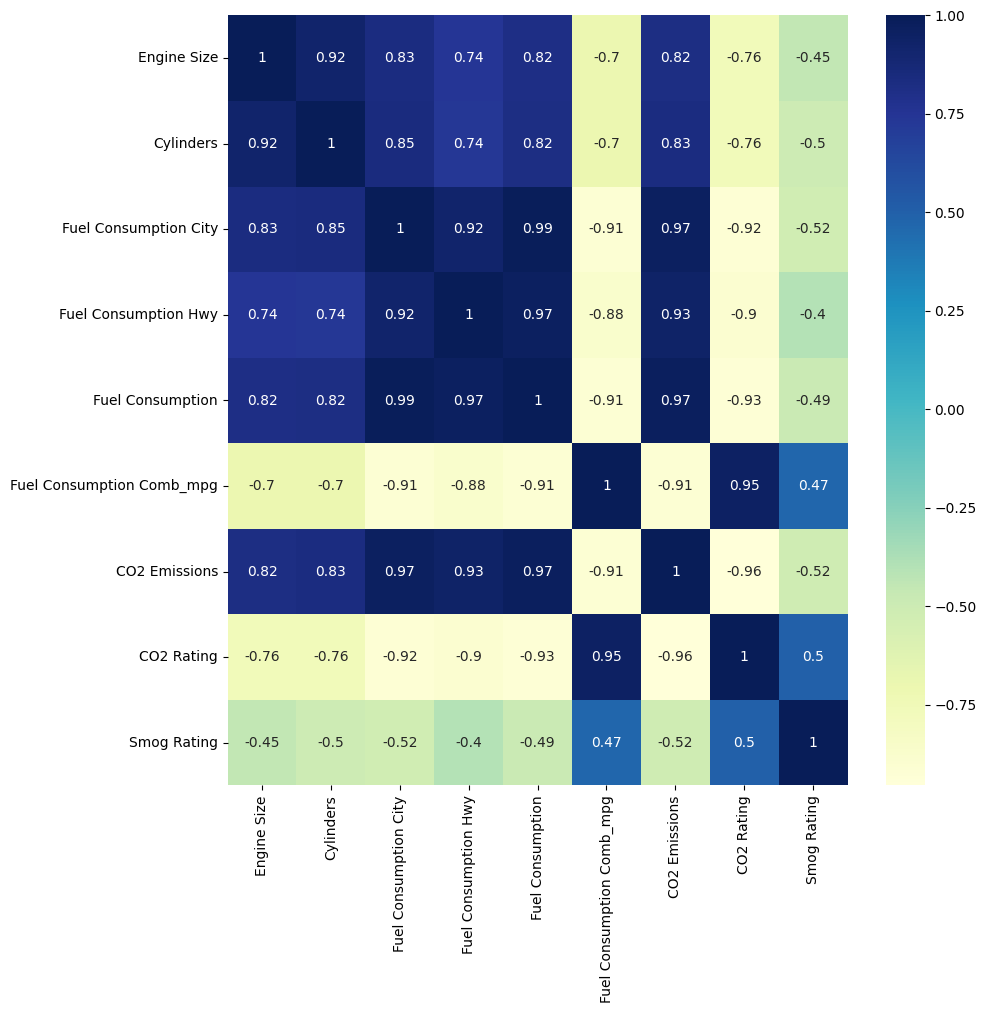

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


Next, we are interested to know which features (attributes except for the labels 'CO2 Emissions') are important in determining the values of the labels ('CO2 Emissions'). We find out the pairwise correlation of labels with the features (other attributes) and look for the top values of the correlation. 

<Axes: >

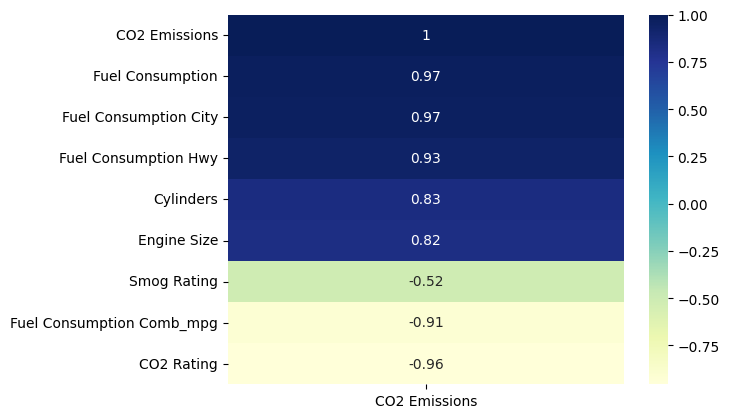

In [91]:
corr = df.corr()[['CO2 Emissions']].sort_values(by='CO2 Emissions', ascending=False)
sns.heatmap(corr, annot=True, cmap='YlGnBu')

Here we see that 'Fuel Consumption', 'Cylinders', and 'Engine Size' have high correlation with the 'CO2 Emissions' (**label / y value / dependent variable**). So, we will use the three attributes as **features / X values / independent variables**.

We do not use 'Fuel Consumption City' and 'Fuel Consumption Hwy' as they are highly correlated with 'Fuel Consumption' (= 55% City + 45% Highway).
 
*(Note: Remember the condition for MLR model that it should have little or no multicollinearity, the independent variables should not be correlated with each other.)*

In [92]:
df_attr = df[['Engine Size','Cylinders','Fuel Consumption', 'CO2 Rating', 'CO2 Emissions']]
df_attr.head()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating,CO2 Emissions
0,2.4,4,8.6,6,200
1,3.5,6,11.2,4,263
2,2.0,4,9.9,5,232
3,2.0,4,10.3,5,242
4,2.0,4,9.8,5,230


<Axes: >

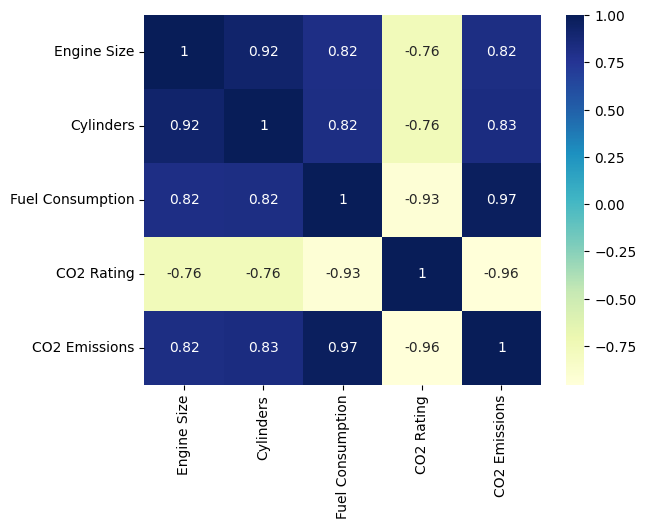

In [93]:
sns.heatmap(df_attr.corr(),annot=True,cmap='YlGnBu')

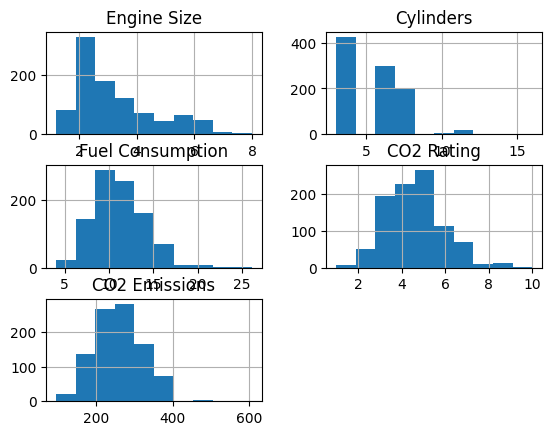

In [94]:
df_attr.hist()
plt.show()

In [95]:
X = df_attr.drop('CO2 Emissions', axis=1)   # drop the CO2 emission variable from X
y = df_attr[['CO2 Emissions']]

Train Test Split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [97]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (764, 4)
X_test: (191, 4)
Y_train: (764, 1)
Y_test: (191, 1)


Import Multiple Linear Regression Model

In [98]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred=linreg.predict(X_test)
y_pred

array([[316.52252594],
       [259.40522273],
       [240.31418357],
       [191.43868751],
       [333.24318986],
       [273.89646479],
       [325.31412086],
       [271.21075751],
       [289.05468022],
       [238.08476171],
       [359.82446736],
       [276.78431215],
       [327.54354272],
       [278.3553085 ],
       [273.58372664],
       [288.39625472],
       [168.20154279],
       [242.31546271],
       [288.39625472],
       [199.62190186],
       [231.01625829],
       [281.69944129],
       [269.43762108],
       [190.62816686],
       [222.47880872],
       [249.54460915],
       [235.05336708],
       [282.89019979],
       [276.12588665],
       [247.31518729],
       [225.8229415 ],
       [287.27299593],
       [250.6811275 ],
       [308.85454885],
       [294.27399965],
       [199.69794943],
       [192.95438482],
       [187.53292532],
       [332.12847893],
       [193.2878715 ],
       [334.3924513 ],
       [311.24461372],
       [325.13602307],
       [281

In [100]:
X.head()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
0,2.4,4,8.6,6
1,3.5,6,11.2,4
2,2.0,4,9.9,5
3,2.0,4,10.3,5
4,2.0,4,9.8,5


In [101]:
# The coefficients
print ('Intercept: ',linreg.intercept_)    #21.95450118
print ('Coefficients: ', linreg.coef_[0])  #0.10278997  3.93933678 19.33881546

Intercept:  [193.12663534]
Coefficients:  [ -0.76047572   4.43809518  11.14710928 -17.66359008]


In [102]:
Accuracy=r2_score(y_test,y_pred)*100
print(Accuracy)

97.92582962551907


In [104]:
# Prediction
# What is the expected value of CO2 Emission based on the following observation values?
# Engine Size: 8.00
# Cylinders: 16.00
# Fuel Consumption: 26.10

# CO2 Emissions  = Intercept + Engine Size * Coefficient_1  + Cylinders * Coefficient_2 + Fuel Consumption * Coefficient_3
# CO2 Emissions  = 21.95450118 + Engine Size * 0.10278997  + Cylinders * 3.93933678 + Fuel Consumption * 19.33881546
print(21.95450118 + 8.00 * 0.10278997 + 16 * 3.93933678 + 26.10 * 19.33881546) #590.549292926

new_data = [[8.00], [16.00], [26.10], [4.0]]
new_data = pd.DataFrame(new_data).T
linreg.predict(new_data)

590.549292926


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[478.33754447]])

In [105]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 80.91220426847816
R-squared: 0.9792582962551907
Mean Absolute Error: 6.58998949511009


R2 is close to 1. 
Remeber, MAE and MSE should be low to show that the model performs well.

Text(0.5, 1.0, 'Actual vs. Predicted CO2 emission')

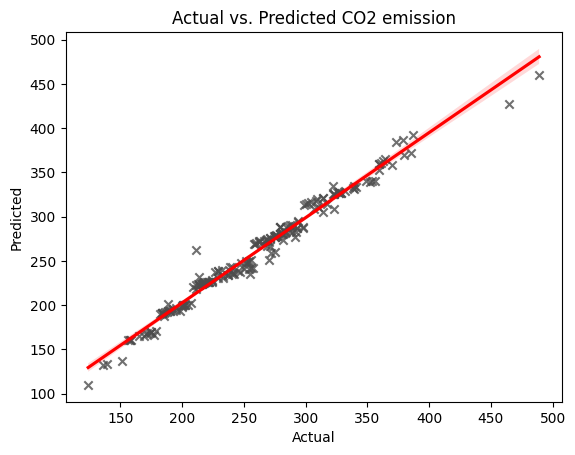

In [106]:
# Plotting the actual vs predicted values
# plt.scatter(y_test, y_pred)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
sns.regplot(x=y_test,y=y_pred,ci=99, marker="x", color=".3", line_kws=dict(color="r"))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted CO2 emission')

# Feature Scaling

In [107]:
#Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaledX = scale.fit_transform(X)
print(scaledX)

[[-0.58736541 -0.87138956 -0.87689859  1.00268962]
 [ 0.21605563  0.16301321  0.02364703 -0.35172139]
 [-0.87951851 -0.87138956 -0.42662578  0.32548411]
 ...
 [-0.87951851 -0.87138956 -0.42662578  0.32548411]
 [-0.87951851 -0.87138956 -0.35735304  0.32548411]
 [-0.87951851 -0.87138956 -0.11489845  0.32548411]]


# Normalising data

In [108]:
#Normalising numeric data
new_df = (df_attr - df_attr.mean()) / df_attr.std()
new_df.head()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating,CO2 Emissions
0,-0.587058,-0.870933,-0.876439,1.002165,-0.927922
1,0.215942,0.162928,0.023635,-0.351537,0.044597
2,-0.879058,-0.870933,-0.426402,0.325314,-0.433944
3,-0.879058,-0.870933,-0.287929,0.325314,-0.279576
4,-0.879058,-0.870933,-0.461021,0.325314,-0.464818


After Feature Scaling and Normalising the data, we train the model similarly.

In [109]:
# Feature matrix and target vector
X_feature = new_df.drop('CO2 Emissions', axis=1)  # We assume 'CO2 Emissions' is the column we want to predict
y_target = new_df['CO2 Emissions']

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

# Initialize the multiple regression model
multi_reg_model = LinearRegression()

# Fit the model to the training data
multi_reg_model.fit(X_train, y_train)

# Predict the housing prices on the test set
y_pred = multi_reg_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.03672812222589342
R-squared: 0.9557070570351044
Mean Absolute Error: 0.10924628769317901


The MSE and MAE is small and R2 is close to 1.